In [ ]:
pip install pycaret[full] --user

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/pubg_preprocessed_dataset.csv")

In [2]:
df.head()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,...,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo-fpp,matchType_normal-solo-fpp,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,target
0,0,-0.401378,-0.635482,-0.863759,-0.615608,-0.38914,-0.531014,1.189336,-0.669241,-0.758527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4444
1,1,-0.401378,-0.635482,-0.170210,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6400
2,2,1.573589,-0.635482,-0.348166,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7755
3,3,-0.401378,-0.635482,-0.614303,-0.615608,-0.38914,-0.531014,-0.798064,-0.669241,-0.758527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1667
4,4,-0.401378,-0.635482,-0.105534,-0.615608,-0.38914,-0.531014,-0.798064,0.204353,0.740253,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1875


In [3]:
import pycaret
from pycaret.regression import *

In [4]:
s = setup(data = df, target = 'target', preprocess=False , session_id=123)


,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(181009, 34)"
4,Transformed data shape,"(181009, 34)"
5,Transformed train set shape,"(126706, 34)"
6,Transformed test set shape,"(54303, 34)"
7,Numeric features,33


In [14]:
best_model = compare_models(exclude=['rf', 'et'], cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0970,0.0178,0.1334,0.8032,0.0929,0.4221,29.1100
lightgbm,Light Gradient Boosting Machine,0.0977,0.0180,0.1341,0.8011,0.0933,0.4292,5.3200
xgboost,Extreme Gradient Boosting,0.0982,0.0182,0.1347,0.7993,0.0937,0.4241,1.7600
gbr,Gradient Boosting Regressor,0.0994,0.0184,0.1356,0.7968,0.0944,0.4413,37.7800
ridge,Ridge Regression,0.1211,0.0246,0.1570,0.7275,0.1081,0.6236,0.1100
br,Bayesian Ridge,0.1211,0.0246,0.1570,0.7275,0.1081,0.6236,0.3900
lr,Linear Regression,0.1211,0.0247,0.1570,0.7274,0.1081,0.6236,0.3000
omp,Orthogonal Matching Pursuit,0.1320,0.0285,0.1688,0.6851,0.1156,0.6527,0.0900
ada,AdaBoost Regressor,0.1426,0.0309,0.1759,0.6579,0.1313,0.9420,8.8000
dt,Decision Tree Regressor,0.1418,0.0383,0.1958,0.5761,0.1358,0.6023,2.2700


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

* CatBoost, lightgbm, xgboost and gbr are top performer from above.
* Hence using a Boosting Algorithm will be our approach.
* Since XGBoost is less time consuming, we will be using XG-Boost.

In [5]:
xg = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0975,0.0177,0.1332,0.8058,0.0928,0.4165
1,0.0989,0.0184,0.1357,0.7964,0.0939,0.4111
2,0.0973,0.0178,0.1332,0.8034,0.0932,0.4405
3,0.0978,0.0182,0.1349,0.7994,0.0939,0.4244
4,0.0968,0.0178,0.1335,0.8054,0.0932,0.4171
5,0.0959,0.0173,0.1316,0.8091,0.0920,0.4270
6,0.0989,0.0189,0.1373,0.7908,0.0954,0.4359
7,0.0965,0.0173,0.1315,0.8079,0.0917,0.4151
8,0.0973,0.0175,0.1322,0.8084,0.0921,0.4333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

* Since the model is performing well , we don't need to finetune it.
* Although in order to finetune the model :

In [6]:
# tuned_xg = tune_model(xg,early_stopping=True)

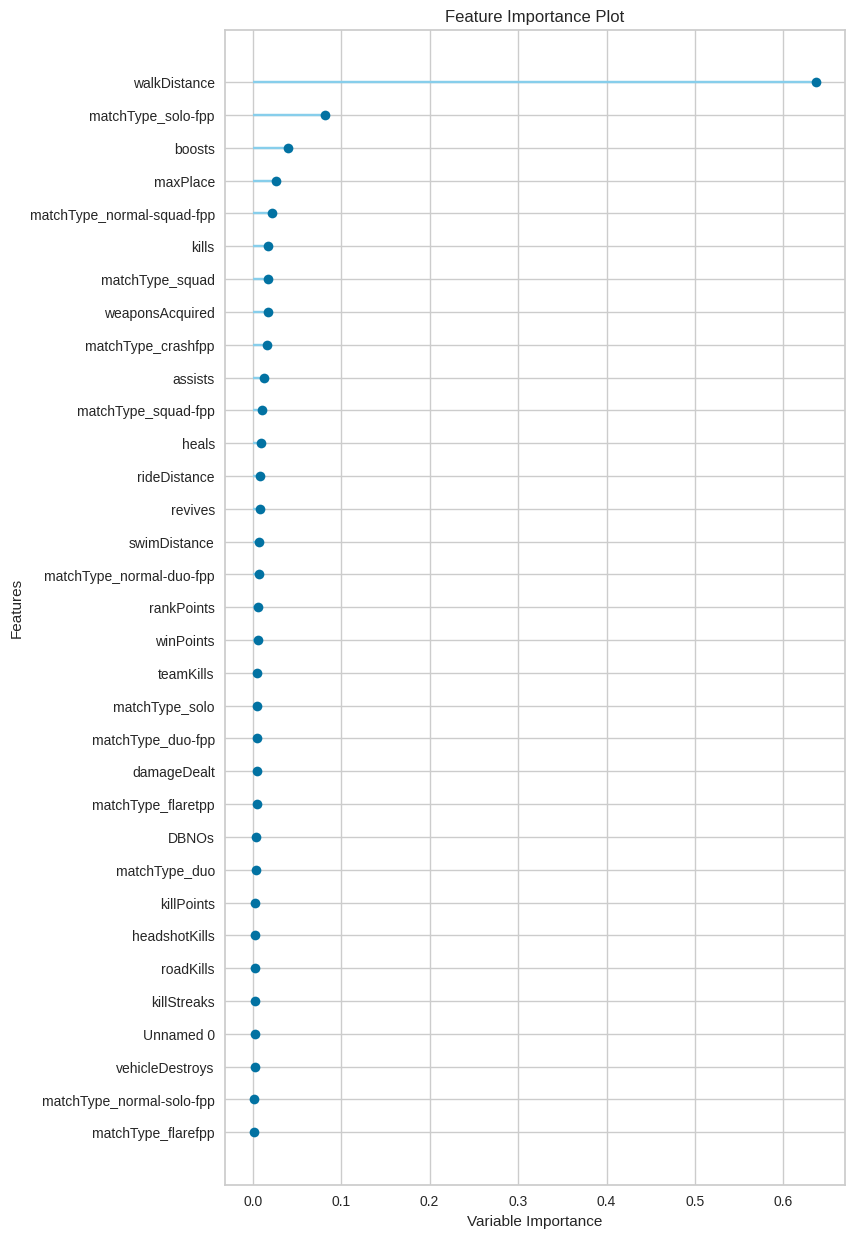

In [7]:
# Feature Importance
plot_model(xg, plot = 'feature_all')

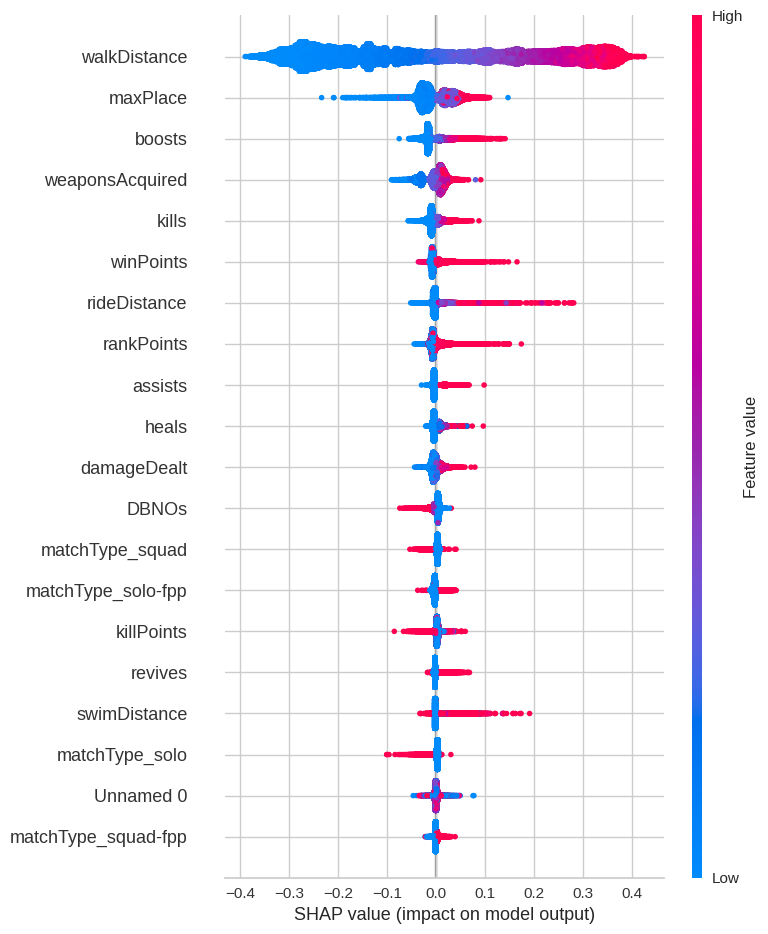

In [8]:
interpret_model(xg)


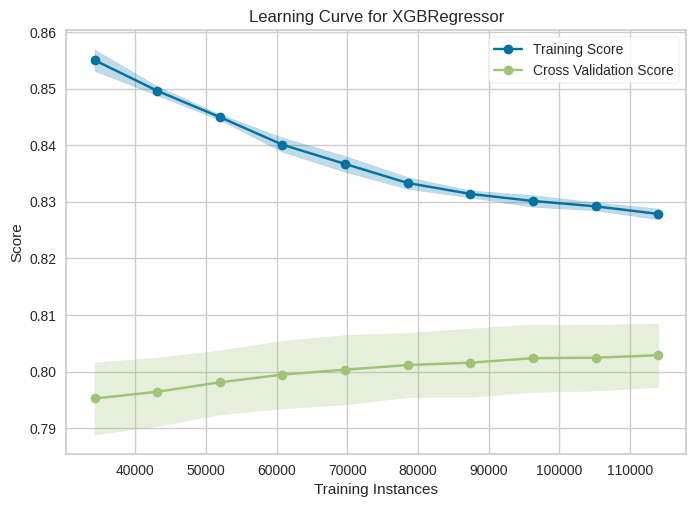

In [9]:
plot_model(xg, plot = 'learning')

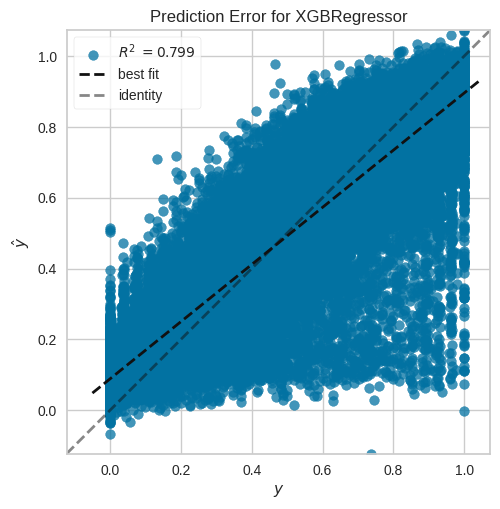

In [10]:
plot_model(xg, plot = 'error')

In [16]:
## give dataframe in same format as input dataframe , and get the predicted outputs on unseen data:

# pred_unseen = predict_model(xg, data = YOUR_DATAFRAME)

In [17]:
# Save the model in a file , to use it elsewhere
save_model(xg, 'saved_xg_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cpu',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feat...row_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, 